In [ ]:
 #### Entropy of The Time Machine #### - Project inspired by Mike Cohen — https://www.mikexcohen.com

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
import string
import pandas as pd

# Importing the text
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

text = book.text

text[:1000]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: The Time Machine\r\n\r\nAuthor: H. G. Wells\r\n\r\nRelease Date: July, 1992 [eBook #35]\r\n[Most recently updated: October 22, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***\r\n\r\n\r\n\r\n\r\nThe Time Machine\r\n\r\nAn Invention\r\n\r\nby H. G. Wells\r\n\r\n\r\nCONTENTS\r\n\r\n I Introduction\r\n II The Machine\r\n III The Time Traveller Returns\r\n IV 

In [ ]:
# Clean up text

strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]


In [ ]:
for i in strings2replace:
  regexp = re.compile(r'%s'%i)
  text = regexp.sub(' ',text)

text[:10002]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.  Title: The Time Machine  Author: H. G. Wells  Release Date: July, 1992 [eBook #35] [Most recently updated: October 22, 2020]  Language: English  Character set encoding: UTF-8   *** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***     The Time Machine  An Invention  by H. G. Wells   CONTENTS   I Introduction  II The Machine  III The Time Traveller Returns  IV Time Travelling  V In the Golden Age  VI The Sunset of Mankind  VII A Sudden Shock  VIII Explanation  IX The Morlocks

In [ ]:
# Finding the distribution of word lengths

# Converting the string to individual words

words = text.split()

words[:30]

npwords = np.array(words)
npwords

array(['ï»¿The', 'Project', 'Gutenberg', ..., 'about', 'new', 'eBooks.'],
      dtype='<U31')

In [ ]:
# Finding the unique lengths in word list 

lengths = []
for i in words:
  lengths.append(len(i))


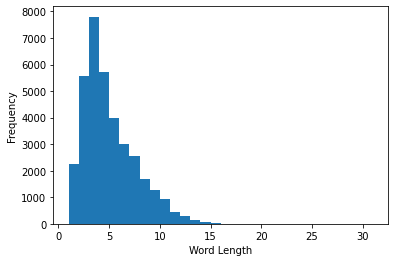

In [ ]:
plt.hist(lengths,bins=30)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Removing all the special characters

regex = re.compile('[^a-zA-Z]')

newtext = regex.sub('', text)

newtext[:30]

'TheProjectGutenbergeBookofTheT'

In [ ]:
# Making all the letters lowercase and in alphabetical order 

lowercasenewtext = newtext.lower()

alphabeticallowercasenewtext = ''.join(sorted(lowercasenewtext))


alphabeticallowercasenewtext[:30]

'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'

In [ ]:
# Computing the Letter frequencies 

letters = list(alphabeticallowercasenewtext)

letters[:30]

['a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a']

In [ ]:
frequency = {}

for ltr in letters:
  if ltr in frequency:
    frequency[ltr] += 1
  else:
     frequency[ltr] = 1

print(frequency)


{'a': 12752, 'b': 2171, 'c': 4049, 'd': 6868, 'e': 19781, 'f': 3749, 'g': 3512, 'h': 8841, 'i': 11312, 'j': 187, 'k': 1231, 'l': 6658, 'm': 4420, 'n': 11012, 'o': 11157, 'p': 2867, 'q': 106, 'r': 8895, 's': 9313, 't': 15155, 'u': 4328, 'v': 1435, 'w': 3524, 'x': 282, 'y': 3024, 'z': 108}


In [ ]:
# Creating a plot of the frequencies of each letter

names = list(frequency.keys())
values = list(frequency.values())


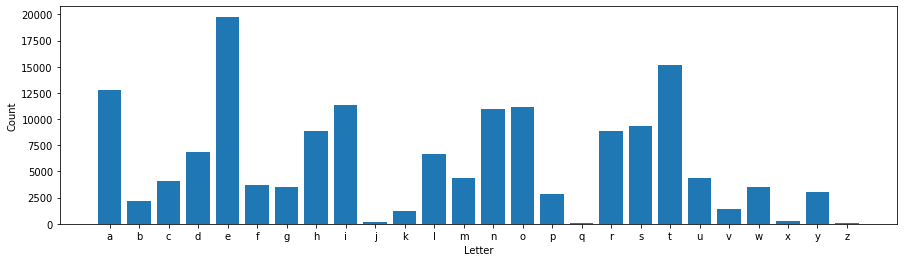

In [ ]:
fig,ax = plt.subplots(1,figsize=(15,4))
ax.bar(range(len(names)),values)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
plt.show()

In [ ]:
# Converting the counts of each letter into probability 

df = pd.DataFrame(frequency, index = [0]).T
df.columns=['Count']


df

,Count
a,12752
b,2171
c,4049
d,6868
e,19781
f,3749
g,3512
h,8841
i,11312
j,187


In [ ]:
total = df['Count'].sum()

df['Probability']  = df['Count']/total

df

,Count,Probability
a,12752,0.081359
b,2171,0.013851
c,4049,0.025833
d,6868,0.043819
e,19781,0.126205
f,3749,0.023919
g,3512,0.022407
h,8841,0.056407
i,11312,0.072172
j,187,0.001193


In [ ]:
print(df['Probability'].sum())

1.0000000000000002


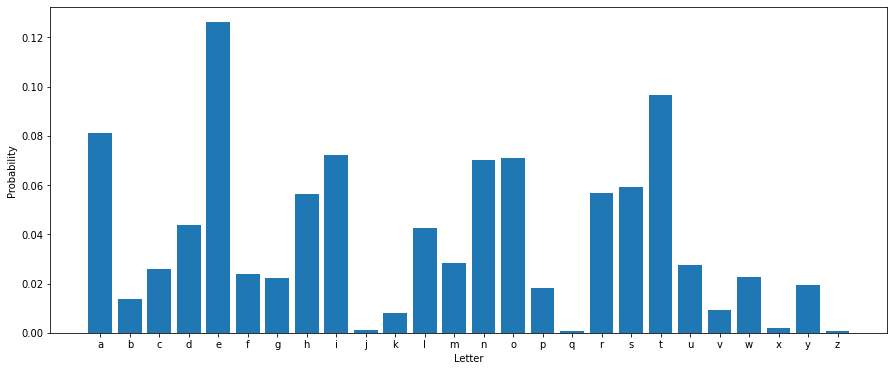

In [ ]:
jig,bx = plt.subplots(1,figsize=(15,6))
bx.bar(range(len(names)),df['Probability'])
bx.set_xticks(range(len(names)))
bx.set_xticklabels(names)
bx.set_xlabel('Letter')
bx.set_ylabel('Probability')
jig;

In [ ]:
#entropy = - (sigma) p(xi)log2(p(xi))

totalentropy = 0
n=0
for ind in df.index:
  totalentropy += -(df['Probability'].iloc[n] * np.log2(df['Probability'].iloc[n]))
  n +=1

print(totalentropy)

4.173084127748868


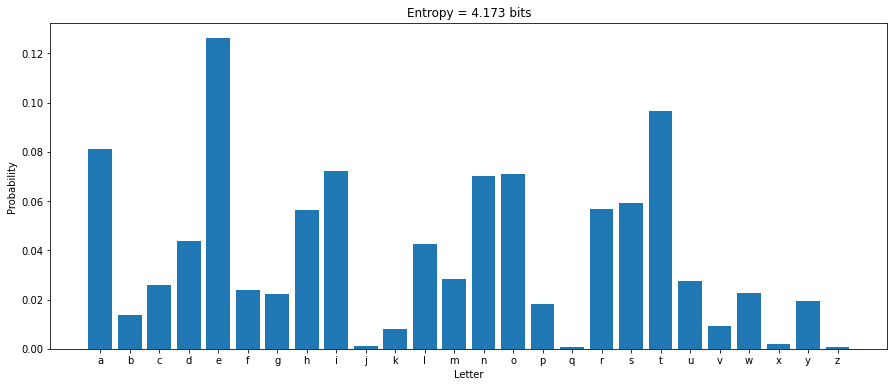

In [ ]:
bx.set_title('Entropy = %.3f bits'%totalentropy)
jig

In [ ]:
# Conditional Entropy 

alphlen = len(names) 

probmat = np.zeros((alphlen, alphlen))

In [ ]:
for i in range(len(text)-1):
  currlet = text[i]
  nextlet = text[i+1]
  if currlet in names and nextlet in names:
    probmat[names.index(currlet),names.index(nextlet)] += 1

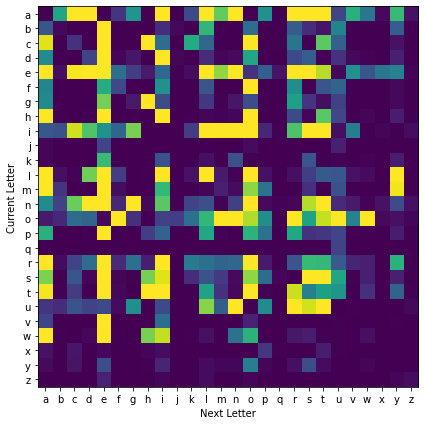

In [ ]:
fig,ax = plt.subplots (1, figsize =(7,7))
ax.imshow(probmat, vmax =500)
ax.set_ylabel('Current Letter')
ax.set_xlabel('Next Letter')
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
plt.show()

In [ ]:
condentr = np.zeros(alphlen)

for i in range(alphlen):
  probs = probmat[i,:]
  probs = probs/sum(probs)
  condentr[i] = -sum(probs*np.log2(probs + np.finfo(float).eps))

condentr



array([ 3.64074099e+00,  2.95010018e+00,  3.24140006e+00,  3.00655688e+00,
        3.67748020e+00,  3.02976822e+00,  3.09026710e+00,  2.07406242e+00,
        3.36534107e+00,  1.45490467e+00,  2.33781232e+00,  3.28422605e+00,
        2.75909226e+00,  3.35378253e+00,  3.70421941e+00,  3.30734043e+00,
       -3.20342650e-16,  3.52314877e+00,  3.36621189e+00,  2.80569391e+00,
        3.46214550e+00,  1.15940487e+00,  2.72231302e+00,  2.57042486e+00,
        2.80682589e+00,  2.21839596e+00])

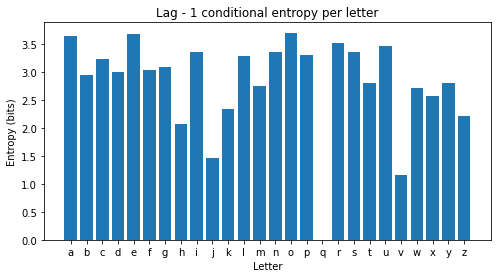

In [ ]:
fig,ax  = plt.subplots(1,figsize=(8,4))
ax.bar(range(alphlen),condentr)
ax.set_xticks(range(alphlen))
ax.set_xticklabels(names)
ax.set_xlabel('Letter')
ax.set_ylabel('Entropy (bits)')
ax.set_title('Lag - 1 conditional entropy per letter')
plt.show()